In [1]:
import torch
import torch.nn as nn
from torch import tensor as tt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.distributions import Categorical
import collections
import random
import pickle
import time
import seaborn as sns
sns.set_style('darkgrid')

# Custom file imports
import trumps_no_pile as tnp
import trumps_five_cards as tfc
import fake_bots_architecture as far
import fake_bots as fb
from fake_bots import *
from helpers import *

from actor_critic import A2Cnet, ac_runner
from epsilon_greedy_1 import eg_model, eg_runner
from epsilon_greedy_2 import eg2_model, eg2_runner
from policy_gradient import PolicyGradient, policy_runner


# Contents

- [Intro](#intro)
- [One card](#oc)
    - [Epsilon greedy 1](#epg1)
    - [Epsilon greedy 2](#epg2)
    - [Policy gradients](#pg)
    - [Actor Critic](#ac1)
- [Two card](#tc)
    - [Epsilon greedy 1](#epg12)
    - [Epsilon greedy 2](#epg22)
    - [Policy gradients](#pg2)
    - [Actor Critic](#ac2)
- [Five card](#fc)
    - [Epsilon greedy 1](#epg13)
    - [Epsilon greedy 2](#epg23)
    - [Policy gradients](#pg3)
    - [Actor Critic](#ac3)
- [Five card with rules](#fcwr)

In [ ]:
%pycodestyle_ofn

# Intro

<a id="intro"></a>

Helper Functions

# One card

<a id="oc"></a>

In [2]:
env = tnp.SuperTrumps()
n_obs = env.observation_space[0]
n_actions = env.action_space

### Epsilon greedy attempt 1

<a id="epg1"></a>

.................................................20000
..................................................40000
.

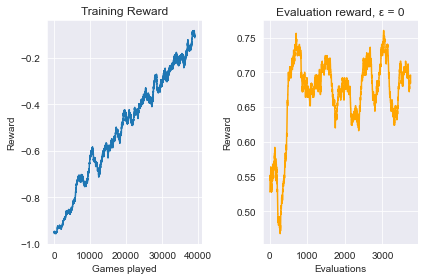

Is the model still making mistakes?
False


In [3]:
eg_agent = eg_model(n_obs, n_actions)
model = eg_runner(eg_agent, env, num_updates=40000, min_epsilon=0.5)
train_model(model, True)
        

### Epsilon greedy with replay memory

<a id="epg2"></a>

..................................................25000
..................................................50000


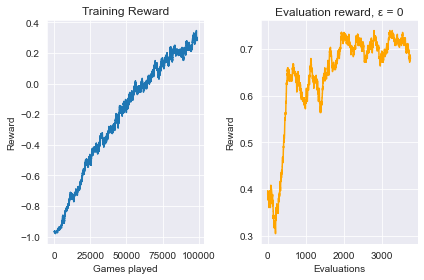

Is the model still making mistakes?
False


In [4]:
eg2_agent = eg2_model(n_obs, n_actions)
model = eg2_runner(eg2_agent, env, num_updates=50000, min_epsilon=0.5)
train_model(model, True)
        

### Policy gradient

<a id="pg"></a>

.................................................20000
..................................................40000
..........................

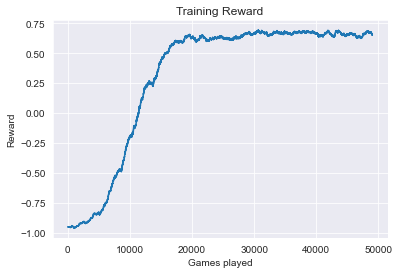

Is the model still making mistakes?
True


In [5]:
pg_agent = PolicyGradient(n_obs, n_actions)
model = policy_runner(pg_agent, env, num_updates=50000)

train_model(model, False)
        

### Actor Critic

<a id="ac1"></a>

.................................................20000
..................................................40000
..................................................60000
.

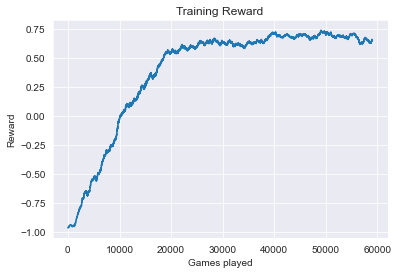

Is the model still making mistakes?
True


In [6]:
agent = A2Cnet(n_obs, n_actions)
model = ac_runner(agent, env, num_updates=60000, num_obs=n_obs)

train_model(model, False)

# Two Cards

<a id="tc"></a>

In [7]:
env = tnp.SuperTrumps(num_cards=2)
n_obs = env.observation_space[0]
n_actions = env.action_space

### Epsilon greedy attempt 1

<a id="epg12"></a>

.................................................20000
..................................................40000
..........................

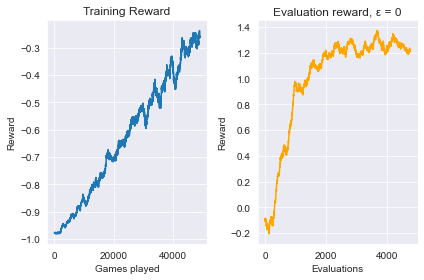

Is the model still making mistakes?
False


In [8]:
eg_agent = eg_model(n_obs, n_actions)
model = eg_runner(eg_agent, env, num_updates=50000, min_epsilon=0.5)
train_model(model, True)


### Epsilon greedy with replay memory

<a id="epg22"></a>

..................................................25000
..................................................50000


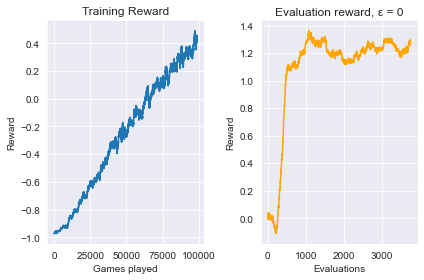

Is the model still making mistakes?
False


In [9]:
eg2_agent = eg2_model(n_obs, n_actions)
model = eg2_runner(eg2_agent, env, num_updates=50000, min_epsilon=0.5)
train_model(model,True)

### Policy gradient

<a id="pg2"></a>


.................................................20000
..................................................40000
..................................................60000
..................................................80000
..................................................100000
.

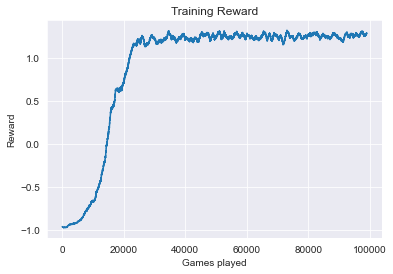

Is the model still making mistakes?
False


In [10]:
pg_agent = PolicyGradient(n_obs, n_actions)
model = policy_runner(pg_agent, env, num_updates=100000)

train_model(model, False)
        

### Actor Critic

<a id="ac2"></a>

.................................................20000
..................................................40000
..................................................60000
..................................................80000
..................................................100000
.

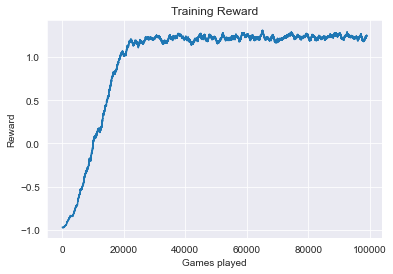

Is the model still making mistakes?
True


In [11]:
env = tnp.SuperTrumps(num_cards=2)
n_actions = env.action_space
n_obs = env.observation_space[0]

agent = A2Cnet(n_obs, n_actions)
model = ac_runner(agent, env, num_updates=100000, num_obs=n_obs)

train_model(model, False)

# Five Cards

<a id="fc"></a>

In [6]:
env = tfc.SuperTrumps()
n_obs = env.observation_space[0]
n_actions = env.action_space

## Epsilon greedy attempt 1
<a id="epg13"></a>

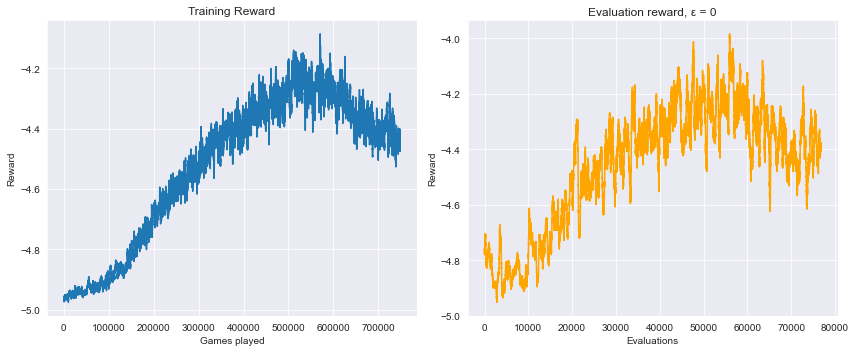

Time taken for the model to run: 73.4 minutes


In [2]:
# eg_agent = eg_model(n_obs, n_actions, lr=1e-3)
# model = eg_runner(eg_agent, env, num_updates=750000, min_epsilon=0.01)
# train_model(model, True, save=True)

with open('models/epsilon_greedy_1_model', 'rb') as f:
    eg_model = pickle.load(f)
    
plot_both_graphs(eg_model.sum_rewards, eg_model.scores)

print('Time taken for the model to run: 73.4 minutes')

## Epsilon greedy with replay memory

<a id="epg23"></a>

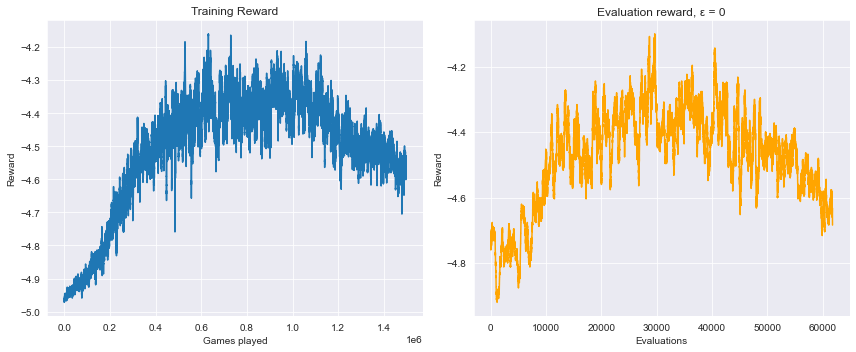

Time taken for the model to run: 79.3 minutes


In [5]:
# eg2_agent = eg2_model(n_obs, n_actions)
# model = eg2_runner(eg2_agent, env, num_updates=750000, lr=1e-3, min_epsilon=0.01)
# train_model(model, True, save=True)

with open('models/epsilon_greedy_2_model', 'rb') as f:
    eg2_model = pickle.load(f)

plot_both_graphs(eg2_model.sum_rewards, eg2_model.scores)

print('Time taken for the model to run: 79.3 minutes')

## Policy gradient

<a id="pg3"></a>

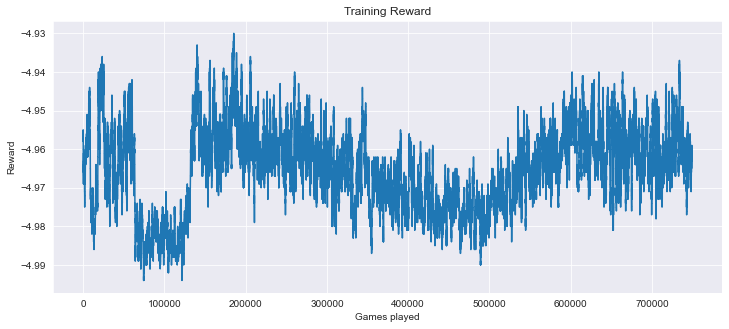

Time taken for the model to run: 71.1 minutes


In [7]:
# pg_agent = PolicyGradient(n_obs, n_actions)
# model = policy_runner(pg_agent, env, num_updates=750000, lr=1e-3)
# train_model(model, False, save=True)

with open('models/policy_gradient_model', 'rb') as f:
    pg_model = pickle.load(f)

plot_training_graph(pg_model.sum_rewards)

print('Time taken for the model to run: 71.1 minutes')

## Actor Critic

<a id="ac3"></a>

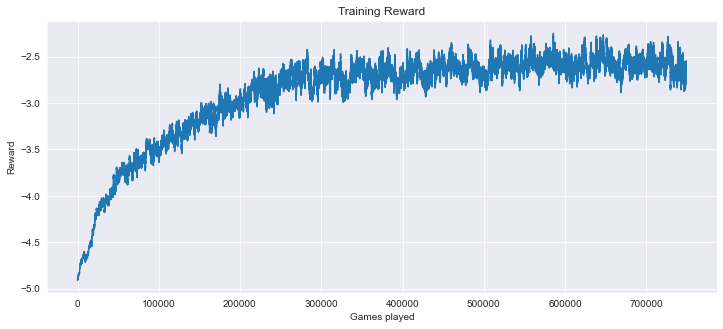

Time taken for the model to run: 209.82 minutes


In [8]:
# pg_agent = PolicyGradient(n_obs, n_actions)
# model = policy_runner(pg_agent, env, num_updates=750000, lr=1e-3)
# train_model(model, False, save=True)

with open('models/actor_critic_model', 'rb') as f:
    ac_model = pickle.load(f)

plot_training_graph(ac_model.sum_rewards)

print('Time taken for the model to run: 209.82 minutes')

# Five Cards with Rules

<a id="fcwr"></a>

In [4]:
list_of_rewards, labels = [], []
env = far.SuperTrumps(num_cards=5, just_first=False)
list_of_rewards.append(simulate(env, great_player))
list_of_rewards.append(simulate(env, max_player))
list_of_rewards.append(simulate(env, random_player))
list_of_rewards.append(simulate(env, min_player))

labels = ['Great Player', 'Max Player', 'Random', 'Min Player']

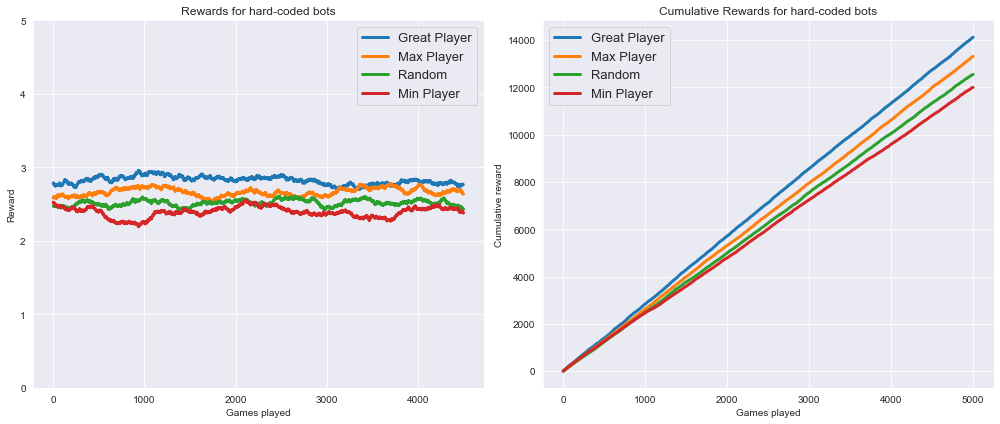

In [5]:
# Plotting results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
for j, lst in enumerate(list_of_rewards):
    mar = moving_average(lst, 500)
    ax1.plot(range(len(mar)), mar, label=labels[j], linewidth=3)

for j, lst in enumerate(list_of_rewards):
    mar = np.cumsum(lst)
    ax2.plot(range(len(mar)), mar, label=labels[j], linewidth=3)

ax1.set_ylim(0, 5)

# Ax1 labels
ax1.set_ylabel('Reward')
ax1.set_xlabel('Games played')
ax1.set_title('Rewards for hard-coded bots')
# Ax2 labels
ax2.set_ylabel('Cumulative reward')
ax2.set_xlabel('Games played')
ax2.set_title('Cumulative Rewards for hard-coded bots')
# Formatting and showing
ax1.legend(prop={'size': 13})
ax2.legend(prop={'size': 13})
fig.tight_layout()
plt.show()

# About / linkedin